In [27]:
import pandas as pd

Listings=pd.read_csv("Listings.csv",encoding="ISO-8859-1",low_memory=False,parse_dates=["host_since"])

In [28]:
Listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [29]:
Listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279539 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [30]:
paris_Listings= Listings.query("city =='Paris'").loc[:,("host_since","neighbourhood","city","accommodates","price")]

paris_Listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [31]:
paris_Listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [33]:
paris_Listings.describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [36]:
paris_Listings.query("accommodates==0" and "price==0")#count()

,host_since,neighbourhood,city,accommodates,price
98209,2020-07-20,Pantheon,Paris,0,0
203257,2020-02-04,Batignolles-Monceau,Paris,0,0
203258,2016-10-17,Opera,Paris,0,0
203259,2020-04-24,Luxembourg,Paris,0,0
203260,2020-04-24,Vaugirard,Paris,0,0
...,...,...,...,...,...
208881,2020-10-22,Pantheon,Paris,0,0
208882,2020-11-26,Enclos-St-Laurent,Paris,0,0
208883,2020-11-26,Vaugirard,Paris,0,0
208884,2020-12-21,Vaugirard,Paris,0,0


In [39]:
paris_Listings_neighbourhood=(paris_Listings.groupby("neighbourhood").agg({"price":"mean"}))
                            
paris_Listings_neighbourhood.head()

,price
neighbourhood,
Batignolles-Monceau,102.612702
Bourse,149.496801
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Elysee,210.536765


In [40]:
paris_Listings_neighbourhood=(paris_Listings.groupby("neighbourhood").agg({"price":"mean"}).sort_values("price"))
                            
paris_Listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [41]:
paris_Listings_neighbourhood=(paris_Listings.groupby("neighbourhood").agg({"price":"mean"}).sort_values("price"))
                            
paris_Listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [42]:
paris_Listings_accommodates=(paris_Listings.query("neighbourhood=='Elysee'").groupby("accommodates").agg({"price":"mean"}))

paris_Listings_accommodates

,price
accommodates,
0,0.000000
1,79.522222
2,155.103352
3,152.828767
4,212.096070
5,328.817073
6,355.508571
7,411.538462
8,405.518519


In [44]:
paris_Listings_accommodates=(paris_Listings.query("neighbourhood=='Elysee'").groupby("accommodates")
                             .agg({"price":"mean"}).sort_values("price"))

paris_Listings_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [45]:
paris_Listings_over_time=(paris_Listings.set_index("host_since").resample("Y").agg({"neighbourhood": "count","price":"mean"}))

paris_Listings_over_time

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8871,114.159847


In [46]:
paris_Listings_over_time=(paris_Listings.set_index("host_since").resample("Y").agg({"neighbourhood": "count","price":"mean"}))

paris_Listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


In [47]:
paris_Listings_over_time=(paris_Listings.set_index("host_since").resample("Y").agg({"neighbourhood": "count","price":"mean"}))

paris_Listings_over_time.tail()

,neighbourhood,price
host_since,,
2017-12-31,4585,108.658888
2018-12-31,4294,138.209362
2019-12-31,5694,129.757113
2020-12-31,3412,141.456038
2021-12-31,133,93.488722


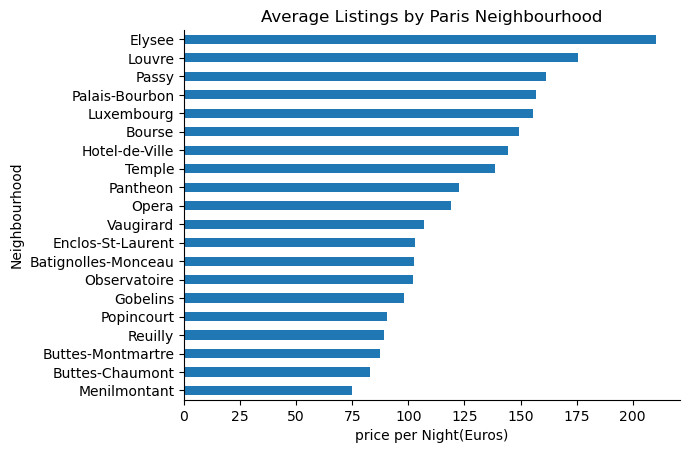

In [54]:
import seaborn as sns


(paris_Listings_neighbourhood.plot.barh(title="Average Listings by Paris Neighbourhood",
                                        xlabel="price per Night(Euros)",ylabel="Neighbourhood",legend=None))

sns.despine()

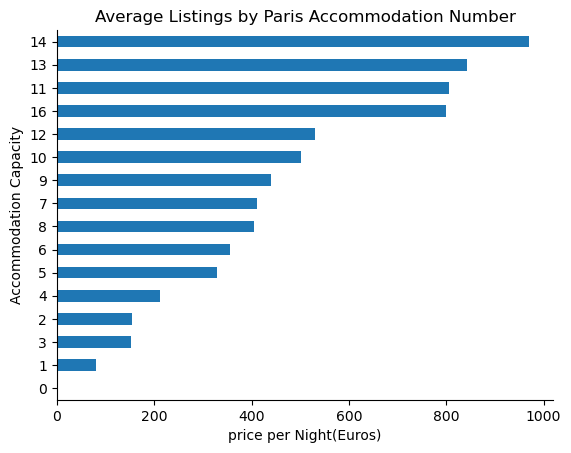

In [56]:
import seaborn as sns


(paris_Listings_accommodates.plot.barh(title="Average Listings by Paris Accommodation Number",
                                        xlabel="price per Night(Euros)",ylabel="Accommodation Capacity",legend=None))

sns.despine()

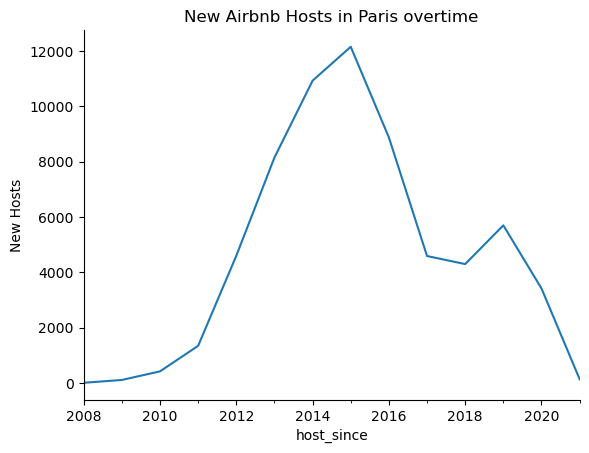

In [58]:
paris_Listings_over_time["neighbourhood"].plot(ylabel="New Hosts",title="New Airbnb Hosts in Paris overtime")

sns.despine()

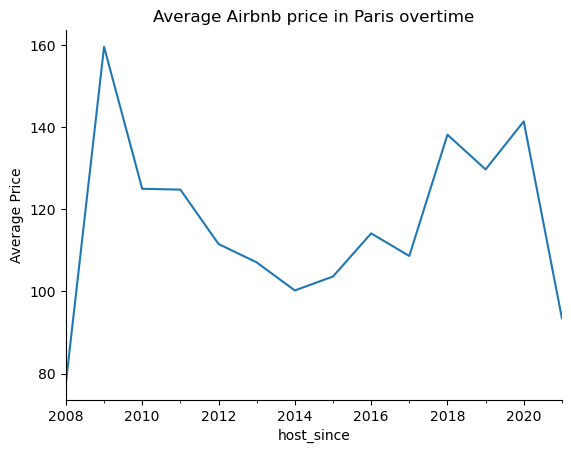

In [59]:
paris_Listings_over_time["price"].plot(ylabel="Average Price",title="Average Airbnb price in Paris overtime")

sns.despine()

Text(0, 0.5, 'New Hosts')

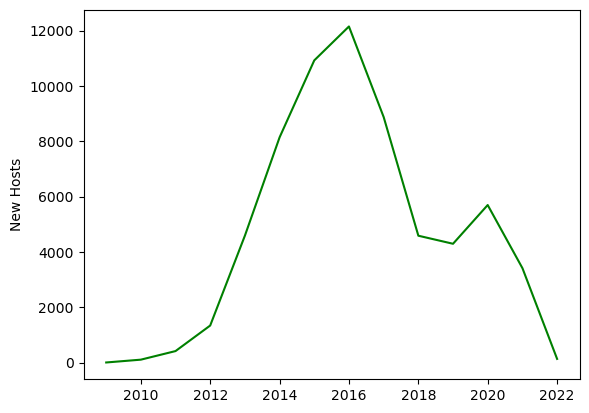

In [66]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
ax.plot(paris_Listings_over_time.index,
       paris_Listings_over_time["neighbourhood"],label="New Host",c="green")
ax.set_ylabel("New Hosts")

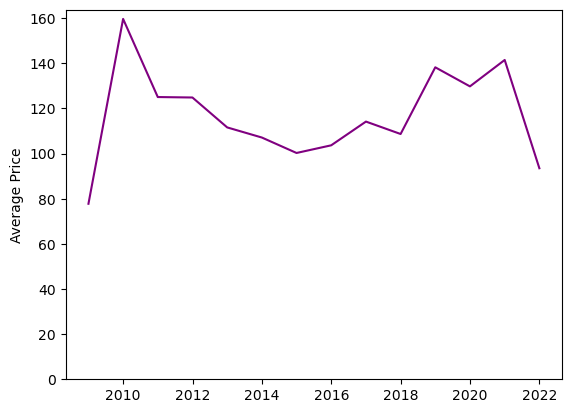

In [73]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()


ax.plot(paris_Listings_over_time.index,
       paris_Listings_over_time["price"],label="Average Price",c="purple")
ax.set_ylim(0)
ax.set_ylabel("Average Price")
ax.set_title=["2015 Regulations lead to fewer New Hosts,Higher prices"]